In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_table('Skynet_59488_psr_b0329_54_62250_11093.A.cal.txt', 
                   comment = '#', delim_whitespace=True,
                  names = ['UTC', 'RA', 'DEC', 'AZ', 'EL', 'YY1', 'XX1', 'CAL', 'Sweep1', 'Sweep2'])

In [3]:
df.head()

,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2
0,41243.060000,3.55244,54.5791,312.1942,53.5886,57.4534,51.4550,-1,0,0
1,41243.160663,3.55247,54.5794,312.1946,53.5886,53.5906,45.0476,1,0,0
2,41243.261326,3.55250,54.5796,312.1950,53.5886,53.5869,45.0506,1,0,0
3,41243.361990,3.55253,54.5798,312.1954,53.5886,53.5654,45.0762,1,0,0
4,41243.462653,3.55256,54.5796,312.1950,53.5886,53.5295,45.0961,1,0,0


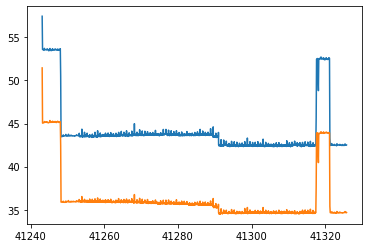

In [4]:
plt.plot(df.UTC,df.YY1)
plt.plot(df.UTC,df.XX1)

In [5]:
# remove rows that have CAL == 1 or -1
df.drop(df[df['CAL'] == -1].index, inplace = True)
df.drop(df[df['CAL'] == 1].index, inplace = True)
df.head()

,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2
51,41248.193828,3.55385,54.5796,312.195,53.5884,43.5044,35.8738,0,0,0
52,41248.294492,3.55388,54.5796,312.195,53.5884,43.4645,35.8895,0,0,0
53,41248.395155,3.55391,54.5796,312.195,53.5884,43.4729,35.8729,0,0,0
54,41248.495818,3.55393,54.5796,312.195,53.5884,43.4868,35.8671,0,0,0
55,41248.596481,3.55396,54.5796,312.195,53.5884,43.5426,35.8773,0,0,0


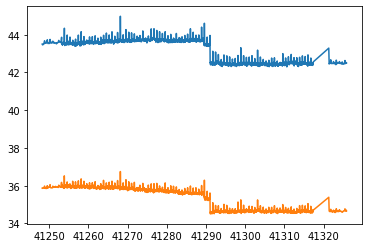

In [6]:
plt.plot(df.UTC,df.YY1)
plt.plot(df.UTC,df.XX1)

In [7]:
#Remove all data that is collected more than 5ms apart

# calculate the integration time for each row
df['TimeDiff'] = df.diff(periods=1, axis=0).UTC

# drop rows that have TimeDiff > 0.05 or a NaN
df.drop(df[df['TimeDiff'] > 0.05].index, inplace = True)
df.dropna(inplace = True)

In [8]:
df.head()

,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2,TimeDiff
101,41253.147301,3.55524,54.5797,312.195,53.5884,43.8665,36.1123,0,0,0,0.020971
102,41253.168273,3.55524,54.5797,312.195,53.5884,43.5595,35.9290,0,0,0,0.020972
103,41253.189244,3.55525,54.5797,312.195,53.5884,43.5894,36.0371,0,0,0,0.020971
104,41253.210216,3.55526,54.5797,312.195,53.5884,43.5676,36.0326,0,0,0,0.020972
105,41253.231187,3.55526,54.5797,312.195,53.5884,43.5869,35.9972,0,0,0,0.020971


(0.0, 0.2)

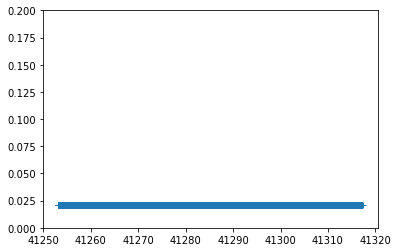

In [9]:
plt.plot(df.UTC, df.TimeDiff,'+')
plt.ylim(0,0.2)

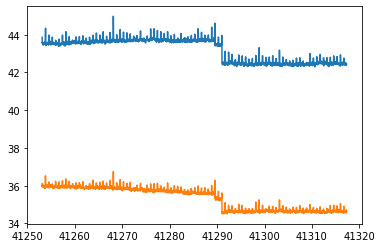

In [11]:
plt.plot(df.UTC,df.YY1)
plt.plot(df.UTC,df.XX1)
#plt.xlim(41289,41295)
#plt.axvline(x = df.UTC[pct_diff2.abs().idxmax()])

In [12]:
# Perform a rolling mean to get a baseline to subtract off

df['XXmean'] = df.XX1.rolling(15).mean()
df['YYmean'] = df.YY1.rolling(15).mean()

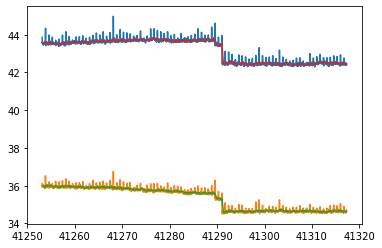

In [13]:
plt.plot(df.UTC,df.YY1)
plt.plot(df.UTC,df.XX1)
plt.plot(df.UTC,df.XXmean)
plt.plot(df.UTC,df.YYmean)
#plt.axvline(x = df.UTC[pct_diff.abs().idxmax()])

In [14]:
df.head()

,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2,TimeDiff,XXmean,YYmean
101,41253.147301,3.55524,54.5797,312.195,53.5884,43.8665,36.1123,0,0,0,0.020971,NaN,NaN
102,41253.168273,3.55524,54.5797,312.195,53.5884,43.5595,35.9290,0,0,0,0.020972,NaN,NaN
103,41253.189244,3.55525,54.5797,312.195,53.5884,43.5894,36.0371,0,0,0,0.020971,NaN,NaN
104,41253.210216,3.55526,54.5797,312.195,53.5884,43.5676,36.0326,0,0,0,0.020972,NaN,NaN
105,41253.231187,3.55526,54.5797,312.195,53.5884,43.5869,35.9972,0,0,0,0.020971,NaN,NaN


In [16]:
# drop Nans from rolling average
df.dropna(inplace = True)

# remove values around the discontinuity
pct_diff = df.XX1.rolling(3).mean().pct_change()
removal_window = range(pct_diff.abs().idxmax()-15, pct_diff.abs().idxmax() + 15)
#print(removal_window)
df.drop(labels=removal_window, axis=0, inplace = True)


In [17]:
df.head()

,UTC,RA,DEC,AZ,EL,YY1,XX1,CAL,Sweep1,Sweep2,TimeDiff,XXmean,YYmean
115,41253.440902,3.55531,54.5797,312.195,53.5884,43.5317,35.9720,0,0,0,0.020971,35.994220,43.565107
116,41253.461874,3.55532,54.5797,312.195,53.5884,43.5668,35.9613,0,0,0,0.020972,35.984153,43.545127
117,41253.482845,3.55533,54.5797,312.195,53.5884,43.5558,35.9740,0,0,0,0.020971,35.987153,43.544880
118,41253.503817,3.55533,54.5797,312.195,53.5884,43.5474,35.9066,0,0,0,0.020972,35.978453,43.542080
119,41253.524788,3.55533,54.5797,312.195,53.5884,43.5604,35.9162,0,0,0,0.020971,35.970693,43.541600


(41288.0, 41295.0)

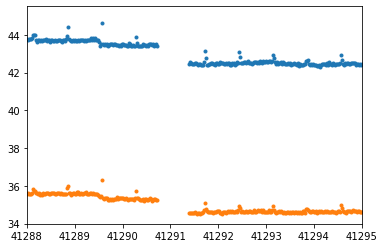

In [23]:
plt.plot(df.UTC,df.YY1,'.')
plt.plot(df.UTC,df.XX1,'.')

#plt.plot(df.UTC,df.YY1/df.YYmean-1)
#plt.plot(df.UTC,df.XX1/df.XXmean-1)

#plt.axvline( x =  df.UTC[pct_diff.abs().idxmax()])

#plt.xlim(41288,41295)

In [28]:
def read_20m_data(filename, time_diff = 0.05, rolling = 15, offset = False):
    # INPUTS
    # filename : string : string with the full filename of data source
    # time_diff: float : integration time ABOVE which we will exclude data
    # rolling: int : number of data points to use for the rolling mean
    # offset: boolean : TRUE = try to identify offset in data to remove data
    #                   FALSE = do not remove any data
    
    # RETURNS
    # pandas dataframe of of cleaned data
    
    df = pd.read_table(filename, 
                   comment = '#', delim_whitespace=True,
                  names = ['UTC', 'RA', 'DEC', 'AZ', 'EL', 'YY1', 'XX1', 'CAL', 'Sweep1', 'Sweep2'])
    
    
    # remove rows that have CAL == 1 or -1
    df.drop(df[df['CAL'] == -1].index, inplace = True)
    df.drop(df[df['CAL'] == 1].index, inplace = True)
    
    #20 m takes some time to start collecting data on fastest integration time
    #Remove all data that is collected more than 3ms apart

    # calculate the integration time for each row
    df['TimeDiff'] = df.diff(periods=1, axis=0).UTC

    # drop rows that have TimeDiff > 0.05 or a NaN
    df.drop(df[df['TimeDiff'] > time_diff].index, inplace = True)
    df.dropna(inplace = True)
    
    # Perform a rolling mean to get a baseline to subtract off

    df['XXmean'] = df.XX1.rolling(rolling).mean()
    df['YYmean'] = df.YY1.rolling(rolling).mean()
    
    # drop Nans from rolling average
    df.dropna(inplace = True)
    
    if offset:
        # remove values around the discontinuity
        pct_diff = df.XX1.rolling(3).mean().pct_change()
        removal_window = range(pct_diff.abs().idxmax()-rolling, pct_diff.abs().idxmax() + rolling)
        df.drop(labels=removal_window, axis=0, inplace = True)
    
    # Divide the data by the rolling average and subtract 1
    df['XXnormalized'] = df.XX1/df.XXmean-1
    df['YYnormalized'] = df.YY1/df.YYmean-1
    
    return(df)

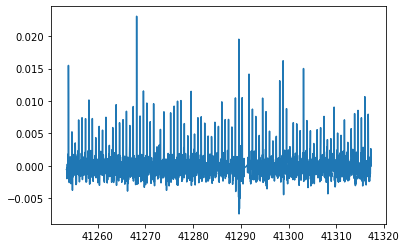

In [30]:
newdf = read_20m_data('Skynet_59488_psr_b0329_54_62250_11093.A.cal.txt', offset = True)

#newdf = read_20m_data('Skynet_59488_psr_b0833_45_62254_11098.A.cal.txt',
#                     time_diff = 0.06,
#                     rolling = 15)


plt.plot(newdf.UTC,newdf.XXnormalized)